In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)

from utils import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

CACHEPATH, RAW_DATA, PRODUCED_DATASETS = create_cache_path()

In [2]:
%%time
hemato = make_all_dataset(force_download='no')
hemato.DT_INTER = pd.to_datetime(hemato.DT_INTER)
hemato.DT_SAIDA = pd.to_datetime(hemato.DT_SAIDA)

Optimizing df...

Original df size: Total memory usage: 1530.61 MB
Optimized df size: Total memory usage: 154.20 MB
CPU times: user 26 s, sys: 2.35 s, total: 28.4 s
Wall time: 21.8 s


In [3]:
hemato.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841112 entries, 24 to 7544
Data columns (total 52 columns):
UF_ZI             841112 non-null category
ANO_CMPT          841112 non-null category
MES_CMPT          841112 non-null category
N_AIH             841112 non-null object
MUNIC_RES         841112 non-null category
NASC              841112 non-null category
SEXO              841112 non-null category
UTI_MES_TO        841112 non-null uint8
UTI_INT_TO        841112 non-null uint8
DIAR_ACOM         841112 non-null uint8
QT_DIARIAS        841112 non-null int64
VAL_SH            841112 non-null float32
VAL_SP            841112 non-null float32
VAL_SADT          841112 non-null float32
VAL_ACOMP         841112 non-null float32
VAL_SANGUE        841112 non-null float32
VAL_TOT           841112 non-null float32
VAL_UTI           841112 non-null float32
US_TOT            841112 non-null float32
DT_INTER          841112 non-null datetime64[ns]
DT_SAIDA          841112 non-null datetime64[n

In [4]:
hemato.head()

UF_ZI ANO_CMPT MES_CMPT          N_AIH MUNIC_RES      NASC SEXO  \
index                                                                     
24     120000     2017       01  1216100534044    120042  20160420    1   
157    120000     2017       01  1217100010049    120020  20150221    3   
159    120000     2017       01  1217100010104    120040  20141006    1   
214    120000     2017       01  1217100011028    120040  20110930    3   
245    120000     2017       01  1217100034612    120020  19841120    3   

       UTI_MES_TO  UTI_INT_TO  DIAR_ACOM  QT_DIARIAS       VAL_SH      VAL_SP  \
index                                                                           
24              0           0          3           4   193.550003   36.139999   
157             0           0          3           3    61.779999    8.150000   
159             5           0         22          22  2268.379883  347.149994   
214             0           0          4           4   201.550003   36.139999   
245             0           0          8           8   233.550003   36.139999   

       VAL_SADT  VAL_ACOMP  VAL_SANGUE      VAL_TOT      VAL_UTI      US_TOT  \
index                                                                          
24          0.0        0.0         0.0   229.690002     0.000000   74.330002   
157         0.0        0.0         0.0    69.930000     0.000000   22.629999   
159         0.0        0.0         0.0  2615.530029  2393.600098  846.440002   
214         0.0        0.0         0.0   237.690002     0.000000   76.919998   
245         0.0        0.0         0.0   269.690002     0.000000   87.269997   

        DT_INTER   DT_SAIDA DIAG_PRINC DIAG_SECUN GESTAO MUNIC_MOV COD_IDADE  \
index                                                                          
24    2016-12-21 2016-12-25       D693       0000      2    120020         3   
157   2017-01-03 2017-01-06       C837       0000      2    120040         4   
159   2017-01-04 2017-01-31       C920       0000      2    120040         4   
214   2016-12-30 2017-01-03       D692       0000      2    120040         4   
245   2017-01-12 2017-01-20       D689       0000      2    120020         4   

       IDADE  DIAS_PERM  MORTE NACIONAL CAR_INT INSTRU       INSC_PN    CBOR  \
index                                                                          
24         8          4      0      010      02      0  000000000000  000000   
157        1          3      0      010      01      0  000000000000  000000   
159        2         27      0      010      01      0  000000000000  000000   
214        5          4      0      010      01      0  000000000000  000000   
245       32          8      0      010      02      0  000000000000  000000   

      VINCPREV     CNES CID_ASSO CID_MORTE COMPLEX FINANC RACA_COR ETNIA  \
index                                                                      
24           0  5336171     0000      0000      02     06       03  0000   
157          0  2000385     0000      0000      02     06       03  0000   
159          0  2000385     0000      0000      02     06       03  0000   
214          0  2000385     0000      0000      02     06       03  0000   
245          0  5336171     0000      0000      02     06       03  0000   

       VAL_SH_FED  VAL_SP_FED  VAL_SH_GES  VAL_SP_GES  VAL_UCI MARCA_UCI  UF  \
index                                                                          
24            0.0         0.0         0.0         0.0      0.0        00  AC   
157           0.0         0.0         0.0         0.0      0.0        00  AC   
159           0.0         0.0         0.0         0.0      0.0        00  AC   
214           0.0         0.0         0.0         0.0      0.0        00  AC   
245           0.0         0.0         0.0         0.0      0.0        00  AC   

      DIAG_PRINC_CAT CNPJ_MANT CGC_HOSP  
index                                    
24               D69       NaN      NaN  
157        

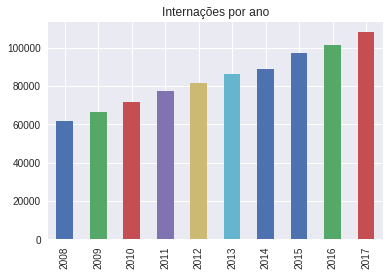

In [5]:
# internações por ano:
# plt.style.use('fivethirtyeight')
hemato.ANO_CMPT.value_counts().sort_index().plot(kind='bar', title='Internações por ano')

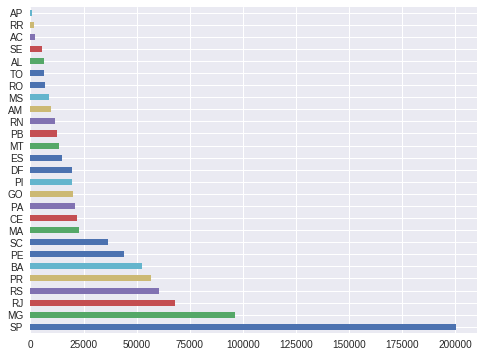

In [6]:
# internações por UF

hemato.UF.value_counts().plot(kind='barh', figsize=(8, 6))

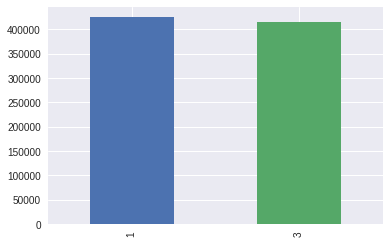

In [7]:
# internações por sexo

hemato.SEXO.value_counts().plot(kind='bar')

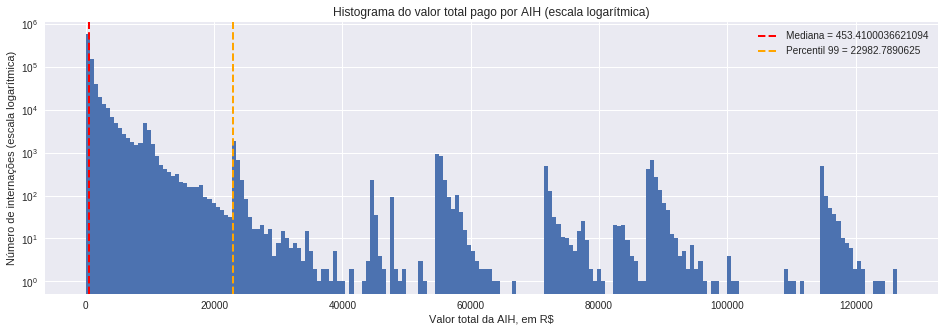

In [8]:
# valor total recebido por AIH
# a escala é logarítmica por causa da amplitude dos valores

hemato.VAL_TOT.hist(log=True, bins=200, figsize=(16, 5))
median = hemato.VAL_TOT.quantile(.5)
p = hemato.VAL_TOT.quantile(.99)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = {}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2, label='Percentil 99 = {}'.format(p))

plt.xlabel('Valor total da AIH, em R$')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do valor total pago por AIH (escala logarítmica)')
plt.show()

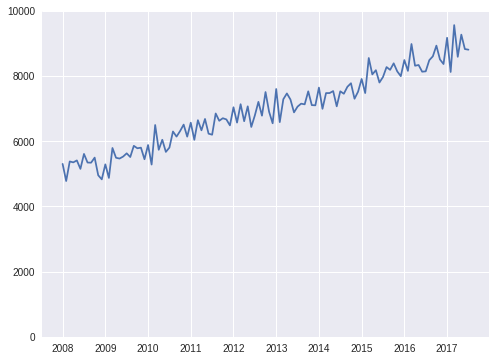

In [9]:
int_by_day = pd.to_datetime(hemato.DT_INTER).value_counts()

# internações por mês

# claramente aumentou o número absoluto
# parece que as vezes a velocidade de crescimento diminui um pouco no inverno com picos em fevereiro (?)
# TODO: ver a população a cada ano e ver se aumentou o percentual de internações hemato

int_by_day['2008':'2017'].resample('M').sum()[:-5].plot(figsize=(8, 6),
                                                        ylim=(0, 10000))
plt.show()

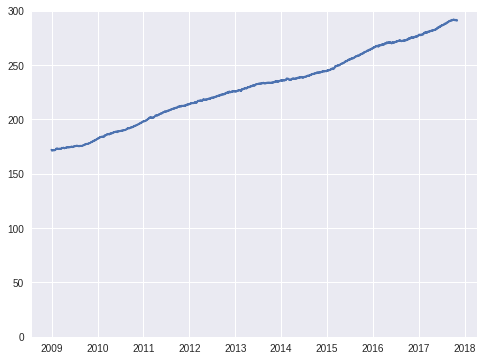

In [10]:
# (cada ponto é a média das internações dos últimos 365 dias)

int_by_day['2008':'2017'].resample('D').sum().rolling(365).mean()[:-60].plot(figsize=(8, 6),
                                                                             ylim=(0, 300))
plt.show()

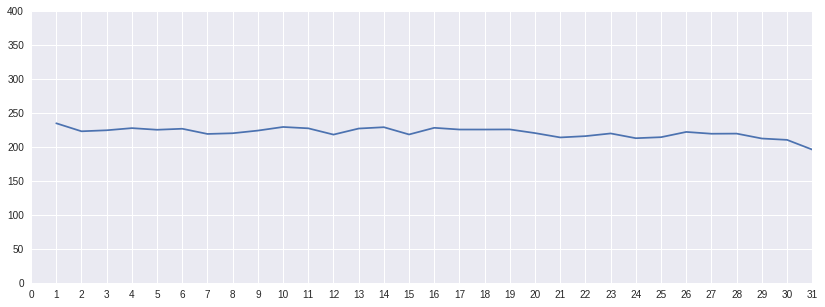

In [11]:
# media de internações por dia do mês

int_by_day.groupby(int_by_day.index.day).mean().plot(figsize=(14, 5), xlim=(0, 31), ylim=(0,400),
                                                     xticks=(np.arange(32))) 
plt.show()
# deixei até o dia 30 porque pocos meses tem 31 dias

In [12]:
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

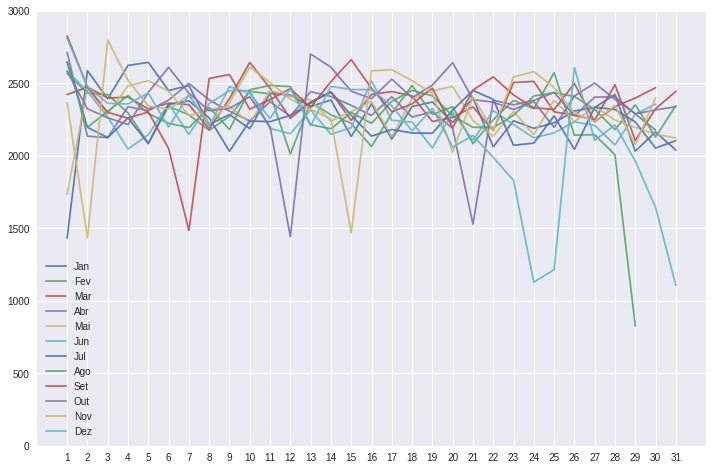

In [13]:
# Internações por dia, em cada mês
# (planejamento de plantões/sobreavisos)
# não é a prevalência, é o número de novas internações (incidência)

pivoted = hemato.pivot_table('N_AIH', index=hemato.DT_INTER.dt.day, columns=hemato.DT_INTER.dt.month,
                             aggfunc='count')

pivoted.columns.name = None
pivoted.columns = months
pivoted.index.name = None

pivoted.plot(figsize=(12, 8), legend=True, alpha=.9,
             xticks=(np.arange(1, 32)), yticks=(np.arange(4601, step=500)), ylim=(0, 3000))
plt.show()

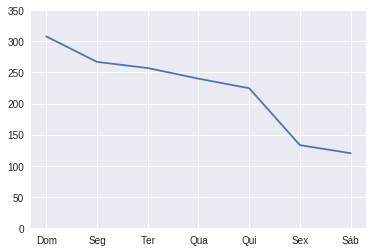

In [14]:
# media de internações por dia da semana

int_by_day.groupby(int_by_day.index.weekday).mean().plot(ylim=(0,350))
plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.show()

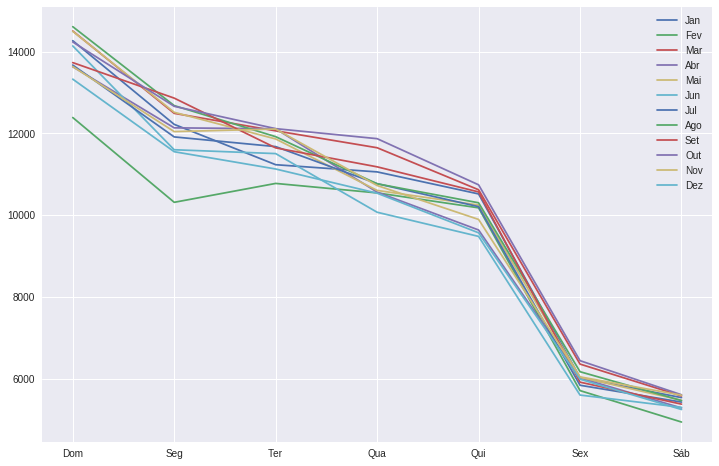

In [15]:
# Internações por dia da semana, em cada mês
# (planejamento de plantões/sobreavisos)
# não é a prevalência, é o número de novas internações (incidência)

pivoted = hemato.pivot_table('N_AIH', index=hemato.DT_INTER.dt.weekday, columns=hemato.DT_INTER.dt.month,
                             aggfunc='count')

pivoted.columns.name = None
pivoted.columns = months
pivoted.index.name = None

pivoted.plot(figsize=(12, 8), legend=True)
plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.show()

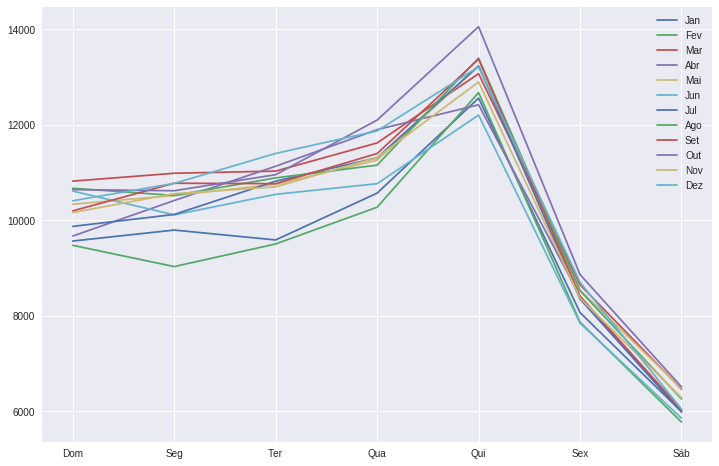

In [16]:
# Altas por dia da semana, em cada mês
# (planejamento de plantões/sobreavisos)
# não é a prevalência, é o número de novas internações (incidência)

pivoted = hemato.pivot_table('N_AIH', index=hemato.DT_SAIDA.dt.weekday, columns=hemato.DT_SAIDA.dt.month,
                             aggfunc='count')

pivoted.columns.name = None
pivoted.columns = months
pivoted.index.name = None

pivoted.plot(figsize=(12, 8), legend=True)
plt.xticks(np.arange(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])
plt.show()

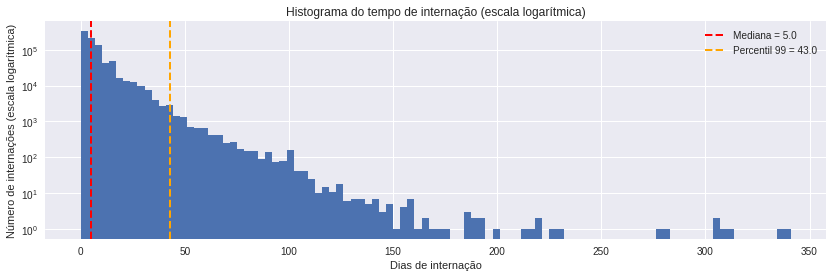

In [17]:
# tempo de internação

hemato.DIAS_PERM.hist(bins=100, log=True, figsize=(14, 4))
median = hemato.DIAS_PERM.quantile(.5)
p = hemato.DIAS_PERM.quantile(.99)
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label='Mediana = {}'.format(median))
plt.axvline(x=p, color='orange', linestyle='--', linewidth=2, label='Percentil 99 = {}'.format(p))

plt.xlabel('Dias de internação')
plt.ylabel('Número de internações (escala logarítmica)')
plt.legend(loc=1)
plt.title('Histograma do tempo de internação (escala logarítmica)')
plt.show()

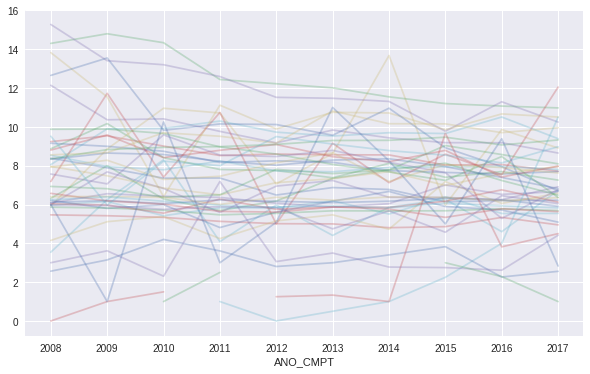

In [18]:
pivoted = hemato.pivot_table('DIAS_PERM', columns='DIAG_PRINC_CAT', index='ANO_CMPT', aggfunc='mean')

pivoted.plot(alpha=.3, legend=False, figsize=(10, 6))
plt.xticks(np.arange(10), pivoted.index)
plt.show()

## Todo:

X DIAG_PRINC separar CIDs de hemato antes de juntar os arquivos.

X Por que o N_AIH tem numeros repetidos? Interna várias vezes com o mesmo registro? Erro?

Identificar a cidade pelo CEP e verificar quem tem um endereço e interna em outra cidade/estado.

Posso usar o MUNIC_RES pra fazer o que escrevi acima.

UTI_MES_TO e UTI_INT_TO pode dizer quais CIDs são mais graves. Se o percentual de internações graves aumentou. Posso relacionar se morrem muito na UTI ou se salvam muito.

Hemato ganha muita diaria de acompanhante? DIAR_ACOM

Quais CIDs ficam mais tempo internado? QT_DIARIAS Algum estado demora mais no tratamento, comparando mesmas doenças? Isso se reflete no resultado do tto?

----------
##### Financeiro

VAL_SH (hosp) VAL_SP (profissional) VAL_TOT VAL_UTI US_TOT Quanto paga cada internação de hemato? Qual paga mais?

FINANC A grana vem de onde?

VAL_SADT, VAL_ACOMP, VAL_SANGUE está zerado???

90 VAL_SH_FED numeric (10, 2) Valor do complemento federal de serviços hospitalares. Está
 incluído no valor total da AIH.

91 VAL_SP_FED numeric (10, 2) Valor do complemento federal de serviços profissionais. Está
 incluído no valor total da AIH.

92 VAL_SH_GES numeric (10, 2) Valor do complemento do gestor (estadual ou municipal) de
 serviços hospitalares. Está incluído no valor total da AIH.

93 VAL_SP_GES numeric (10, 2) Valor do complemento do gestor (estadual ou municipal) de
 serviços profissionais. Está incluído no valor total da AIH.
 
VAL_UCI O que é UCI???

-----------

DT_INTER DT_SAIDA DIAS_PERM Datas de int e alta conferem com as diárias? Há datas de anos/meses anteriores que contaram nesta competencia (atraso de envio?)

Não incluí a natureza jurídica e a gestão porque é certo que vai ter mais internações nos tipos de lugares que existem, seja por imposição legal ou incentivo fiscal. Não quer dizer que sejam mais importantes.

MUNIC_MOV Municipio do estabelecimento. Este dado é confiável? Se for, posso usar pra comparar com o MUNIC_RES.

COD_IDADE IDADE Perfil de idade dos pacientes atendidos.

NACIONAL Nacionalidade do paciente

CAR_INT Vem muito pct hemato de emergência?

CBOR NUM_FILHOS INSTRU VINCPREV Acho importante pra comparar por regiões e por tempo, mas tenho dúvidas da veracidade dos dados.

RACA_COR ETNIA Comparar as duas classificações.

Qual a prevalência de pacientes internados? (Como calcular a prevalencia?)